# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Sultan Nurrochman
- **Email:** sultan.nurrochman@gmail.com
- **ID Dicoding:** sultannurrochman_913

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah penyewaan sepeda selama 24 jam pada hari kerja dan hari libur dan apakah ada perbedaan signifikan dalam jumlah penyewaan sepeda antara hari libur dan hari kerja?
- Bagaiamana tren yang dihasilkan dalam peminjaman sepeda selama seminggu dan bagaimana kira-kira tren peminjaman sepeda per jam selama seharinya
- Bagaimana faktor eksternal seperti kondisi cuaca mempengaruhi distribusi penggunaan sepeda dalam setahun?
- Bagaimana tren yan dihasilkan dari peminjaman sepeda jika berdasarkan faktor temperatur yang dirasakan?

## Import Semua Packages/Library yang Digunakan

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [53]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [54]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai tabel day_df

In [55]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [56]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [57]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [58]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai Tabel hour_df

In [59]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [60]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [61]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [62]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [63]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

Based on the information obtained, the data does not need to be cleaned. Because the data has no missing values or duplicate data. So, i just converting values.

In [64]:
# Mengconvert label pada data
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)


hour_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)


hour_df.weathersit.replace((1,2,3,4), ('Clear','Mist','Light_rain','Heavy_rain'), inplace=True)


hour_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

In [65]:
# Mengconvert label pada data
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)


day_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)


day_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)


day_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

#### day_df

In [66]:
weekly_counts = day_df.groupby(['weekday','workingday', 'holiday',]).size().reset_index(name='count')
weekly_counts

,weekday,workingday,holiday,count
0,Friday,0,1,2
1,Friday,1,0,102
2,Monday,0,1,15
3,Monday,1,0,90
4,Saturday,0,0,105
5,Sunday,0,0,105
6,Thursday,0,1,2
7,Thursday,1,0,102
8,Tuesday,0,1,1
9,Tuesday,1,0,103


In [67]:
weekly_counts.describe()

,workingday,holiday,count
count,12.000000,12.000000,12.000000
mean,0.416667,0.416667,60.916667
std,0.514929,0.514929,50.345097
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,2.000000
50%,0.000000,0.000000,96.000000
75%,1.000000,1.000000,103.000000
max,1.000000,1.000000,105.000000


In [68]:
monthly_counts = day_df.groupby(['mnth', 'workingday', 'holiday']).size().reset_index(name='count')
monthly_counts

,mnth,workingday,holiday,count
0,Apr,0,0,18
1,Apr,0,1,2
2,Apr,1,0,40
3,Aug,0,0,16
4,Aug,1,0,46
5,Dec,0,0,19
6,Dec,0,1,2
7,Dec,1,0,41
8,Feb,0,0,16
9,Feb,0,1,2


In [69]:
monthly_counts.describe()

,workingday,holiday,count
count,33.000000,33.000000,33.000000
mean,0.363636,0.272727,22.151515
std,0.488504,0.452267,16.236766
min,0.000000,0.000000,2.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,0.000000,18.000000
75%,1.000000,1.000000,40.000000
max,1.000000,1.000000,46.000000


In [70]:
atemp_weather_counts = day_df.groupby(['atemp', 'weathersit']).size().reset_index(name='count')
atemp_weather_counts

,atemp,weathersit,count
0,0.079070,Clear,1
1,0.098839,Clear,1
2,0.101658,Clear,1
3,0.116175,Clear,1
4,0.117930,Clear,1
...,...,...,...
702,0.794829,Clear,1
703,0.804287,Clear,1
704,0.804913,Clear,1
705,0.826371,Misty,1


In [71]:
atemp_weather_counts.describe()

,atemp,count
count,707.000000,707.000000
mean,0.471854,1.033946
std,0.163250,0.210171
min,0.079070,1.000000
25%,0.334581,1.000000
50%,0.476638,1.000000
75%,0.607960,1.000000
max,0.840896,4.000000


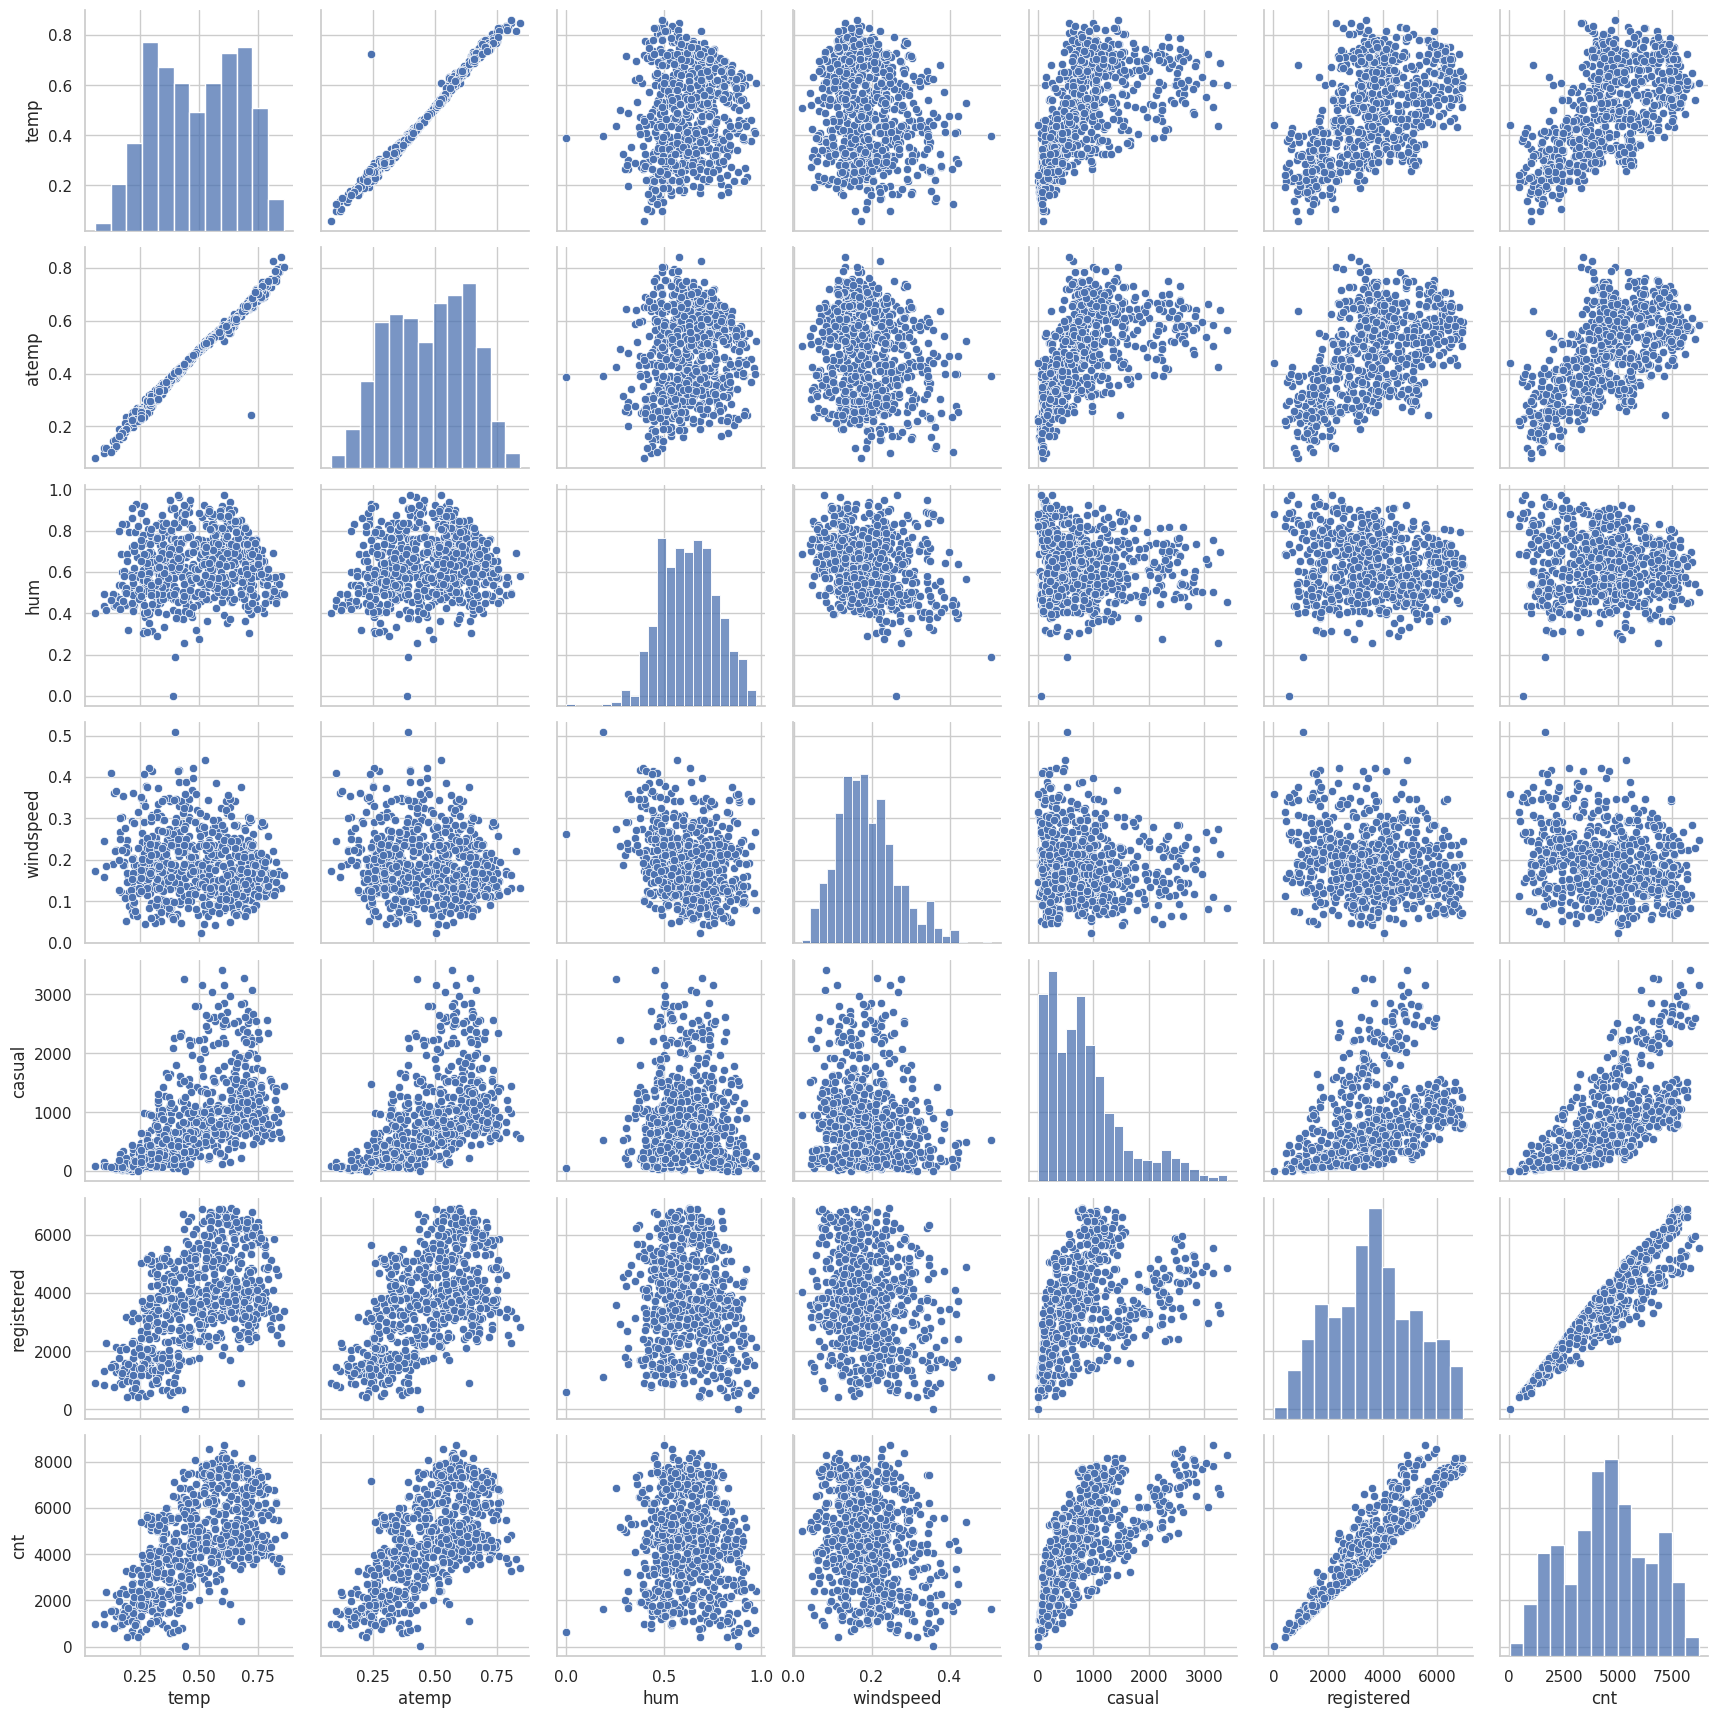

In [72]:
sns.pairplot(day_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])
plt.show()

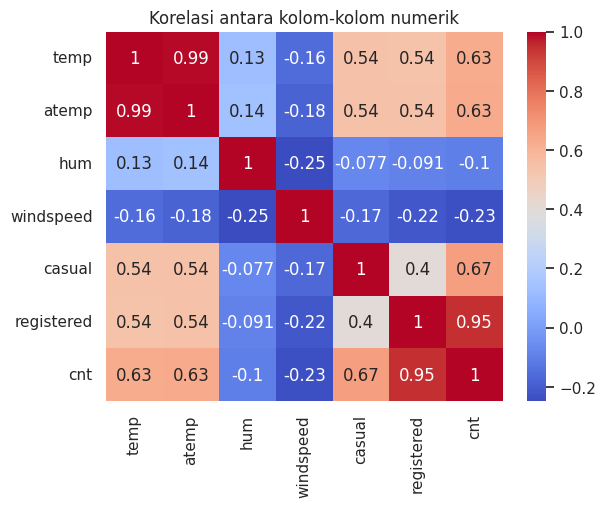

In [73]:
correlation_matrix = day_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi antara kolom-kolom numerik')
plt.show()

#### hour_df

In [74]:
weekly_counts = hour_df.groupby(['weekday', 'hr','workingday', 'holiday',]).size().reset_index(name='count')
weekly_counts

,weekday,hr,workingday,holiday,count
0,Friday,0,0,1,2
1,Friday,0,1,0,102
2,Friday,1,0,1,2
3,Friday,1,1,0,102
4,Friday,2,0,1,2
...,...,...,...,...,...
282,Wednesday,21,1,0,102
283,Wednesday,22,0,1,1
284,Wednesday,22,1,0,102
285,Wednesday,23,0,1,1


In [75]:
weekly_counts.describe()

,hr,workingday,holiday,count
count,287.000000,287.000000,287.000000,287.000000
mean,11.529617,0.418118,0.414634,60.554007
std,6.928077,0.494111,0.493519,47.813848
min,0.000000,0.000000,0.000000,1.000000
25%,6.000000,0.000000,0.000000,2.000000
50%,12.000000,0.000000,0.000000,92.000000
75%,17.500000,1.000000,1.000000,102.000000
max,23.000000,1.000000,1.000000,105.000000


In [76]:
monthly_counts = hour_df.groupby(['mnth', 'workingday', 'holiday']).size().reset_index(name='count')
monthly_counts

,mnth,workingday,holiday,count
0,Apr,0,0,432
1,Apr,0,1,48
2,Apr,1,0,957
3,Aug,0,0,371
4,Aug,1,0,1104
5,Dec,0,0,455
6,Dec,0,1,46
7,Dec,1,0,982
8,Feb,0,0,381
9,Feb,0,1,47


In [77]:
monthly_counts.describe()

,workingday,holiday,count
count,33.000000,33.000000,33.000000
mean,0.363636,0.272727,526.636364
std,0.488504,0.452267,385.403021
min,0.000000,0.000000,46.000000
25%,0.000000,0.000000,96.000000
50%,0.000000,0.000000,432.000000
75%,1.000000,1.000000,957.000000
max,1.000000,1.000000,1104.000000


In [78]:
atemp_weather_counts = hour_df.groupby(['atemp', 'weathersit']).size().reset_index(name='count')
atemp_weather_counts

,atemp,weathersit,count
0,0.0000,Clear,1
1,0.0000,Mist,1
2,0.0152,Clear,3
3,0.0152,Mist,1
4,0.0303,Clear,5
...,...,...,...
171,0.9091,Clear,5
172,0.9242,Clear,5
173,0.9545,Clear,1
174,0.9848,Clear,2


In [79]:
atemp_weather_counts.describe()

,atemp,count
count,176.000000,176.000000
mean,0.461693,98.744318
std,0.262366,120.070777
min,0.000000,1.000000
25%,0.238625,13.000000
50%,0.454500,55.500000
75%,0.681800,141.000000
max,1.000000,787.000000


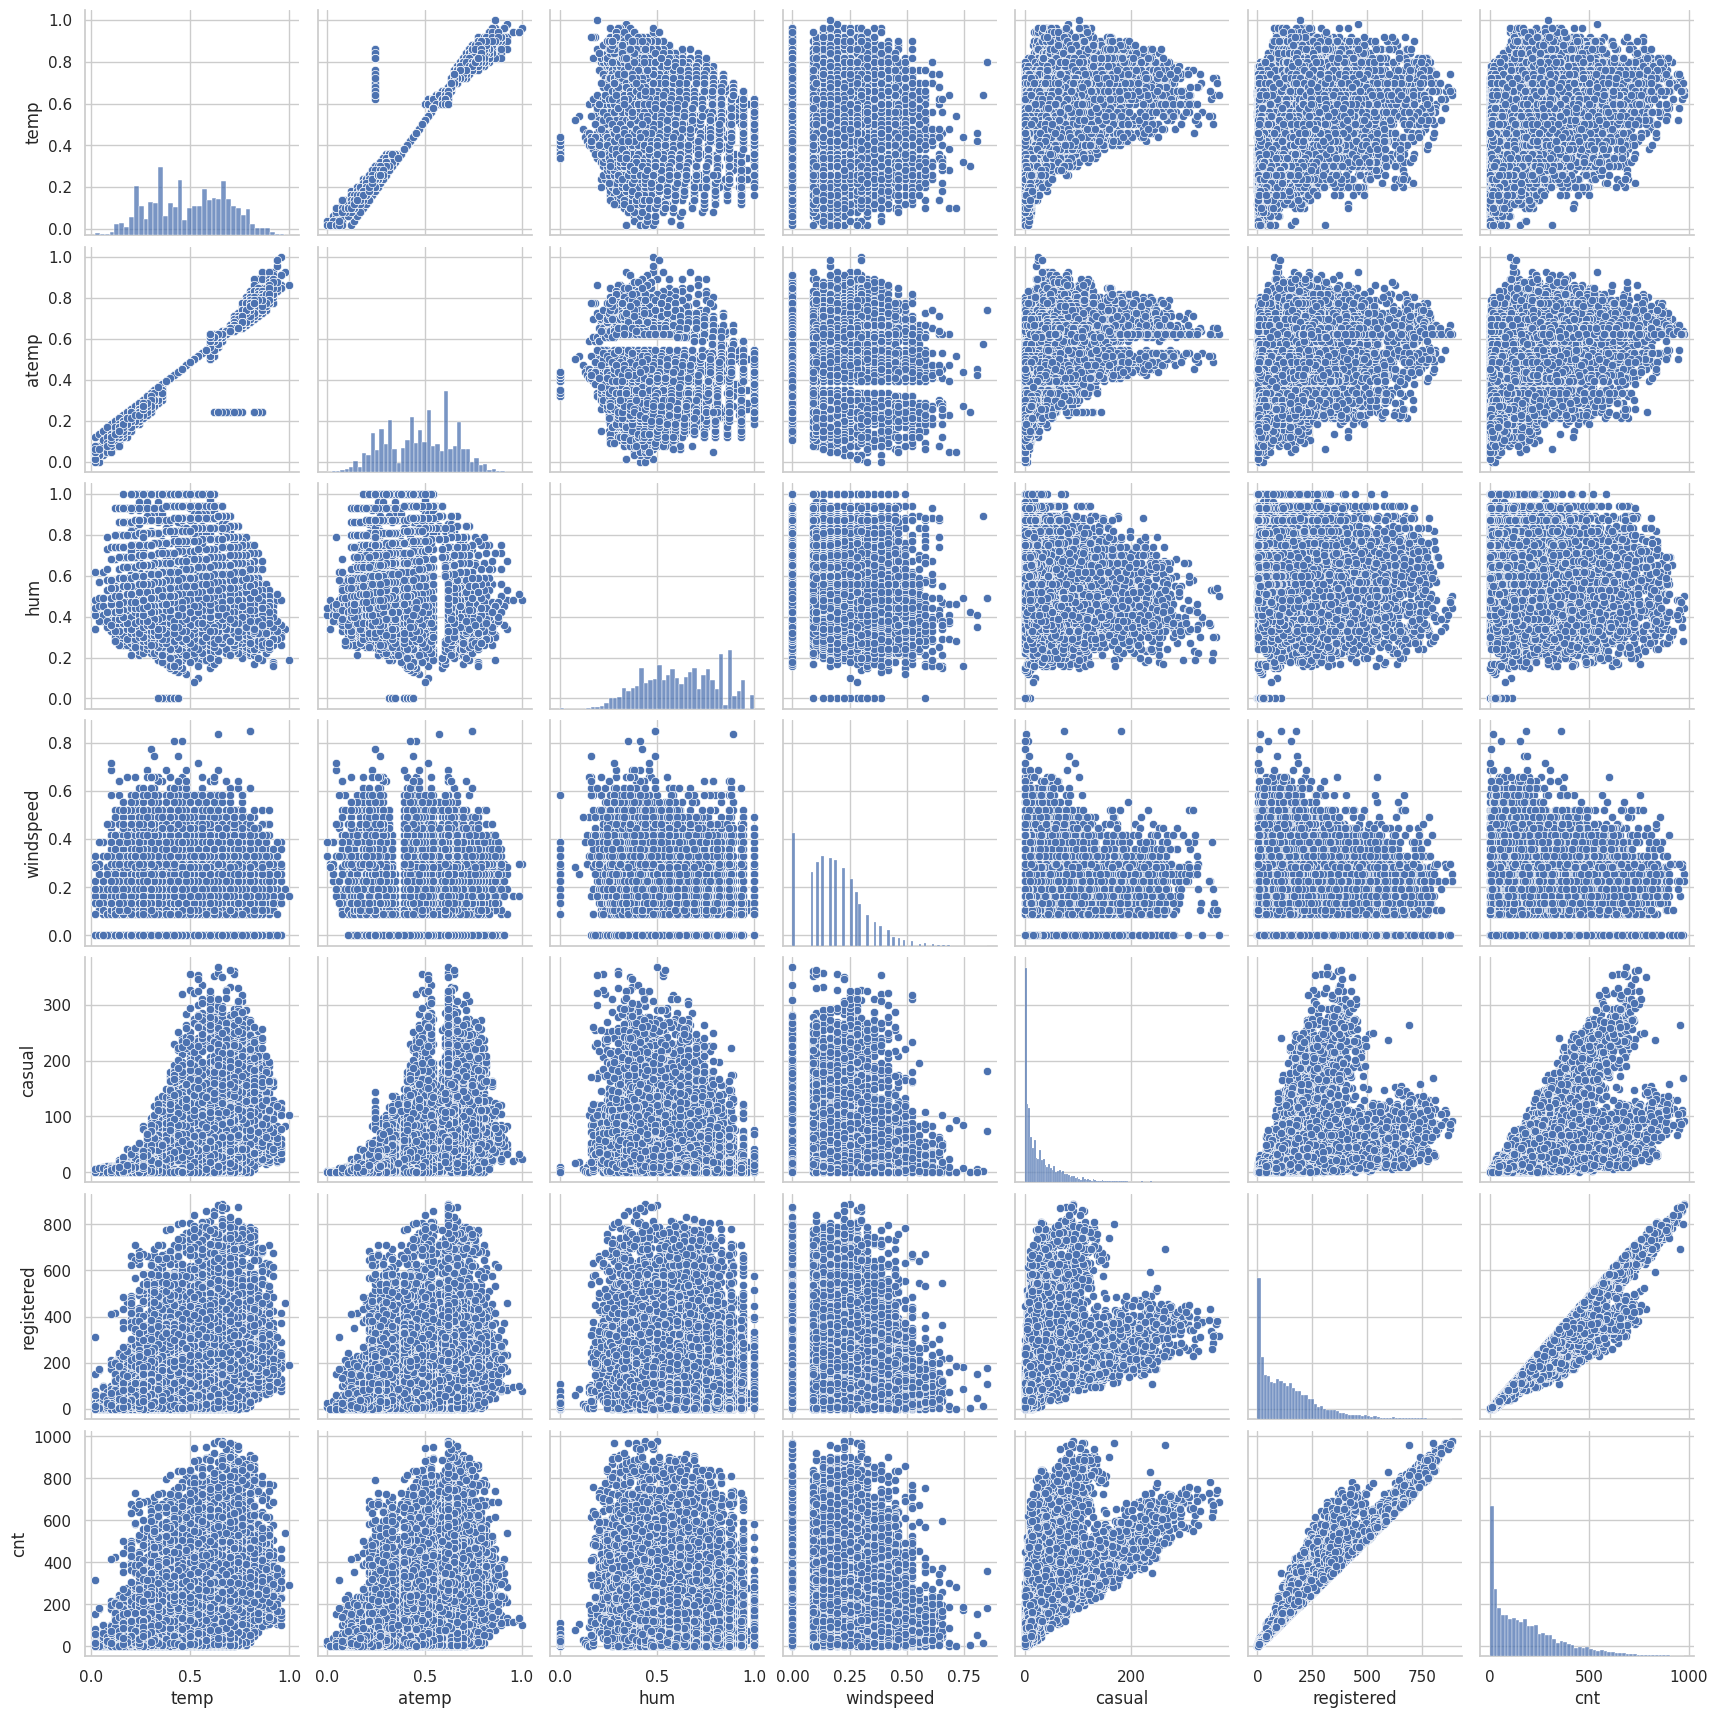

In [80]:
sns.pairplot(hour_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])
plt.show()

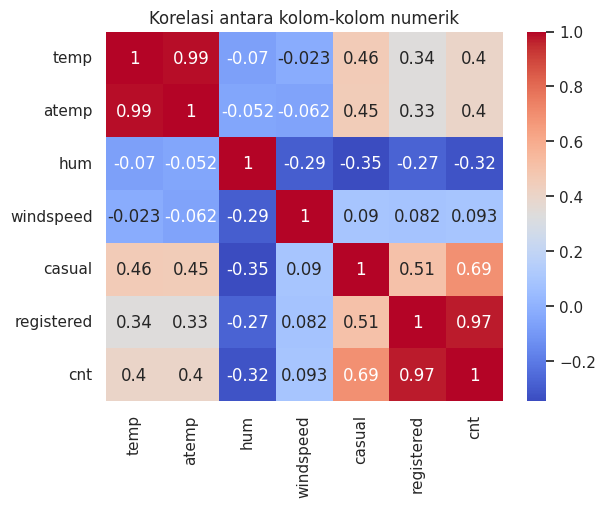

In [81]:
correlation_matrix = hour_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi antara kolom-kolom numerik')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

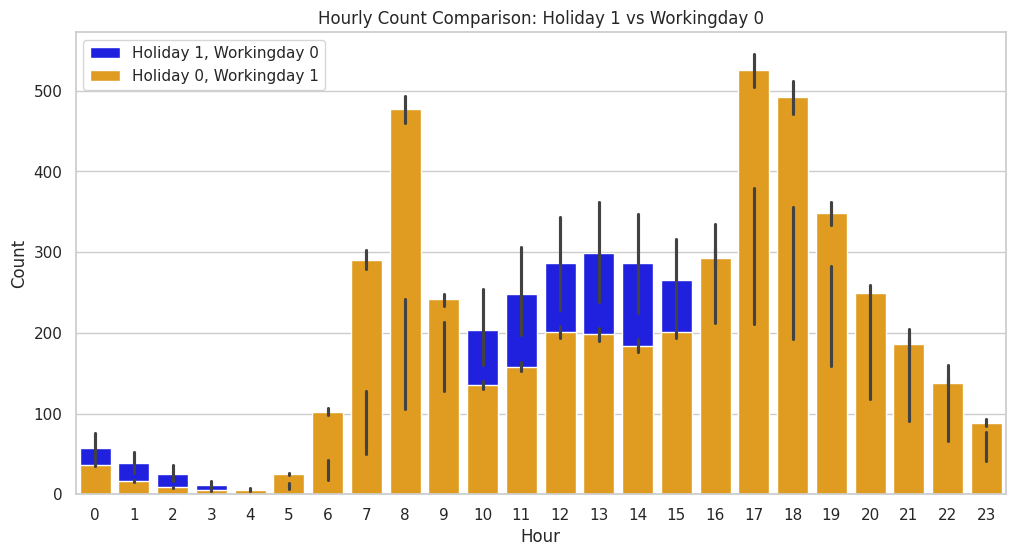

In [82]:
# Filter dataframe untuk kondisi "Holiday 0" dan "Workingday 0"
filtered_holiday_df = hour_df[(hour_df['workingday'] == 0) & (hour_df['holiday'] == 1)]

# Filter dataframe untuk kondisi "Holiday 0" dan "Workingday 1"
filtered_workingday_df = hour_df[(hour_df['workingday'] == 1) & (hour_df['holiday'] == 0)]

# Plot barplot untuk "Holiday 0" dan "Workingday 0"
plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='cnt', data=filtered_holiday_df, color='blue', label='Holiday 1, Workingday 0')

# Plot barplot untuk "Holiday 0" dan "Workingday 1" (di atas barplot sebelumnya)
sns.barplot(x='hr', y='cnt', data=filtered_workingday_df, color='orange', label='Holiday 0, Workingday 1')

plt.title('Hourly Count Comparison: Holiday 1 vs Workingday 0')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend()
plt.show()



### Pertanyaan 2:

Text(0.5, 1.0, 'Distribusi penggunaan sepeda per hari')

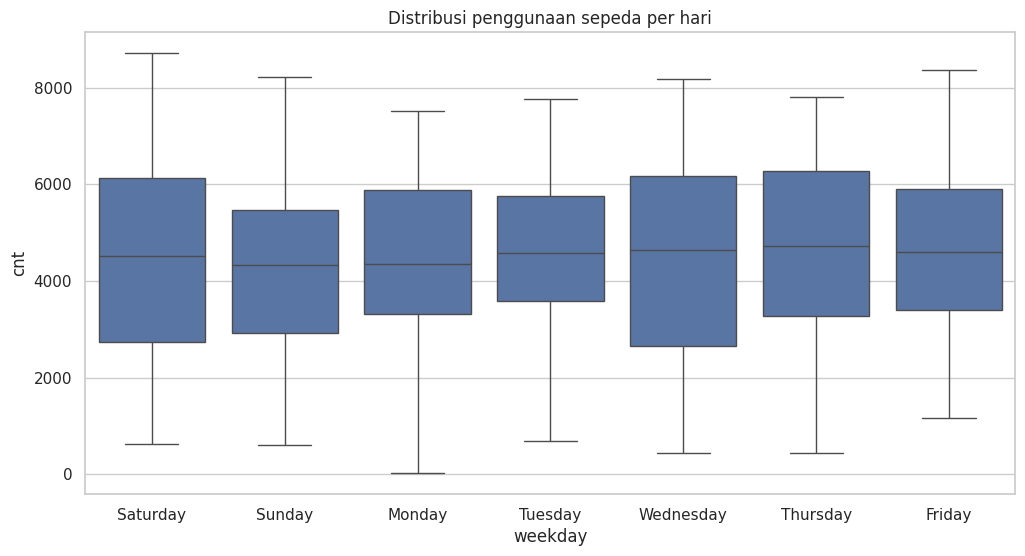

In [83]:
plt.figure(figsize=(12,6))
sns.boxplot(x='weekday', y='cnt', data=day_df)
plt.title('Distribusi penggunaan sepeda per hari')

<ipython-input-84-35123b8e8030>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='hr', y='cnt', data=hour_df, ci=None, color='skyblue')  # Parameter ci=None untuk menghilangkan interval kepercayaan


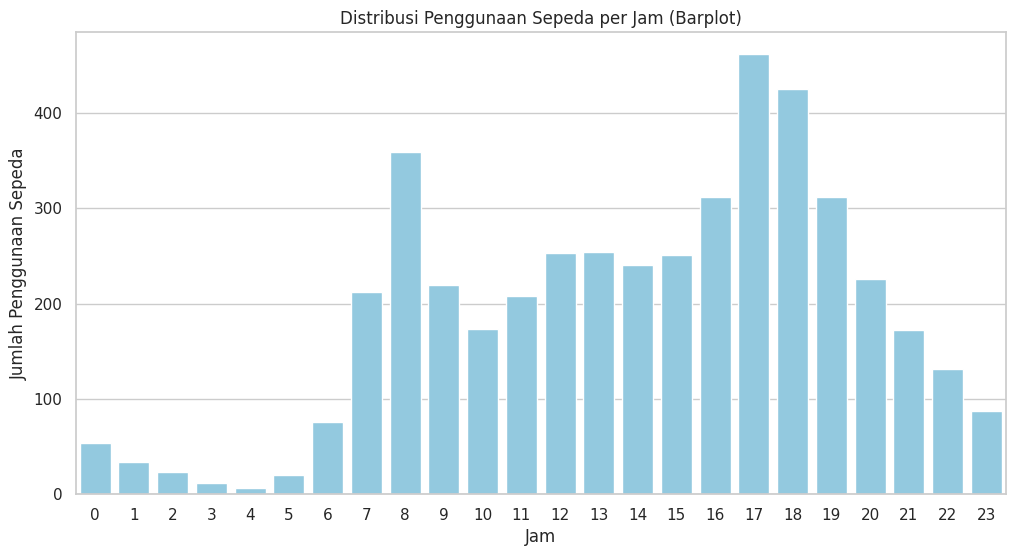

In [84]:
# Mengatur gaya visualisasi Seaborn
sns.set(style="whitegrid")

# Membuat barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='cnt', data=hour_df, ci=None, color='skyblue')  # Parameter ci=None untuk menghilangkan interval kepercayaan

# Menambahkan judul dan label sumbu
plt.title('Distribusi Penggunaan Sepeda per Jam (Barplot)')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penggunaan Sepeda')

# Menampilkan barplot
plt.show()


#### Pertanyaan 3

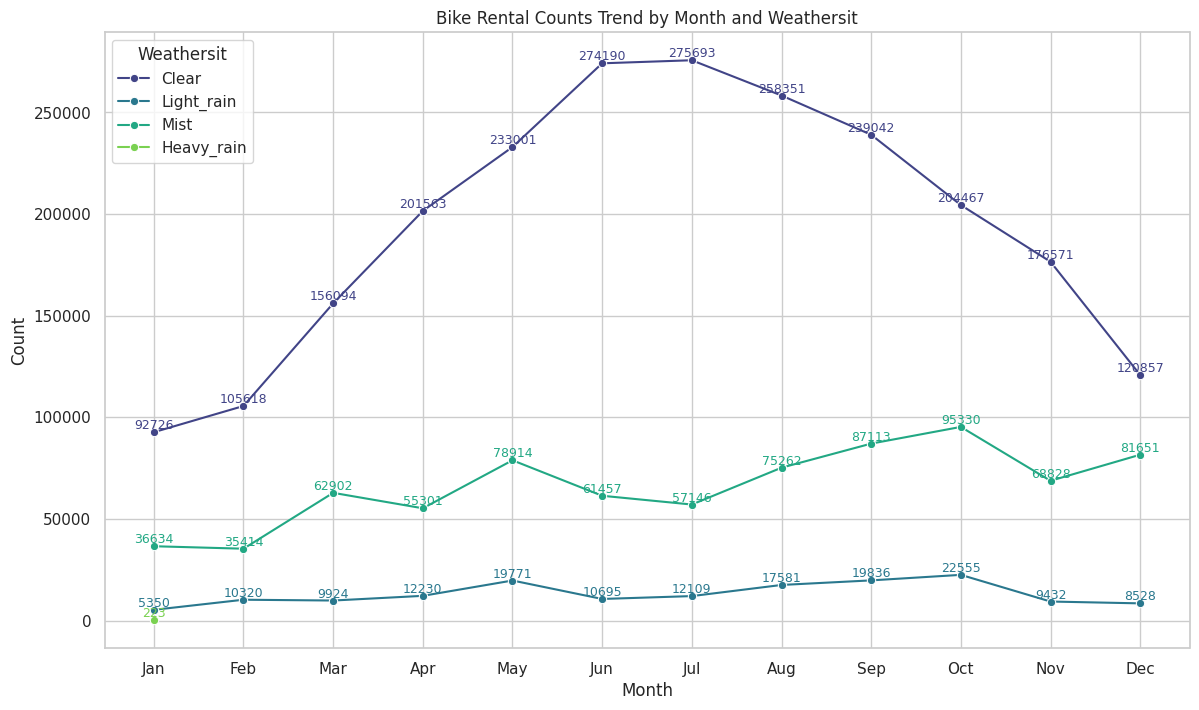

In [85]:
# Visualisasi tren penyewaan sepeda selama satu tahun berdasarkan kondisi cuaca
plt.figure(figsize=(14, 8))

# Mengelompokkan data berdasarkan 'mnth' dan 'weathersit', kemudian menghitung jumlah penyewaan ('cnt') untuk setiap kelompok
monthly_weathersit_counts = hour_df.groupby(['mnth', 'weathersit'])['cnt'].sum().reset_index()

# Mengubah urutan bulan menjadi Januari-Desember
monthly_weathersit_counts['mnth'] = pd.Categorical(monthly_weathersit_counts['mnth'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)

# Membuat line chart untuk setiap kondisi cuaca
sns.lineplot(x='mnth', y='cnt', hue='weathersit', data=monthly_weathersit_counts, palette='viridis', marker='o')

for weathersit, color in zip(monthly_weathersit_counts['weathersit'].unique(), sns.color_palette('viridis', n_colors=len(monthly_weathersit_counts['weathersit'].unique()))):
    subset = monthly_weathersit_counts[monthly_weathersit_counts['weathersit'] == weathersit]
    for i, point in subset.iterrows():
        plt.annotate(f'{int(point["cnt"])}', (point['mnth'], point['cnt']), color=color, fontsize=9, ha='center', va='bottom')

plt.title('Bike Rental Counts Trend by Month and Weathersit')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Weathersit', loc='upper left')
plt.show()

#### Pertanyaan 4

<ipython-input-86-4f61663e93ff>:18: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x='mnth', y='atemp', data=monthly_avg_feel_temp, color='black', scale=0.5)


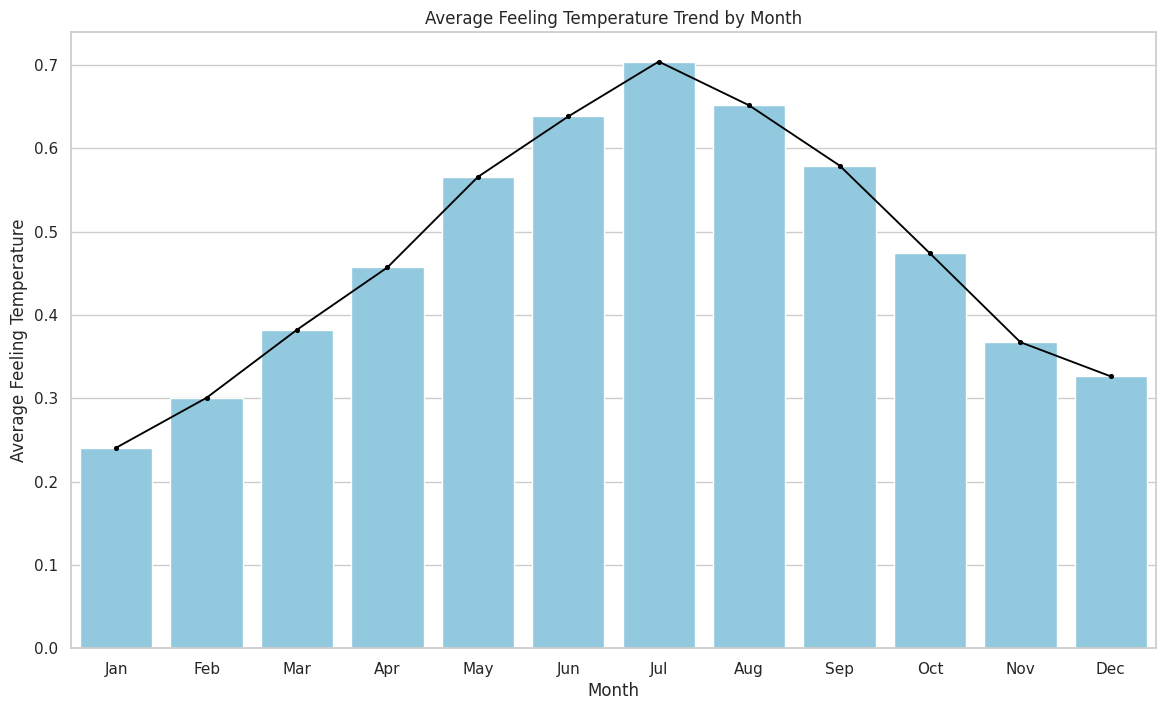

In [86]:
sns.set(style="whitegrid")

# Mengelompokkan data berdasarkan 'mnth' dan menghitung rata-rata feeling temperature per bulan
monthly_avg_feel_temp = hour_df.groupby('mnth')['atemp'].mean().reset_index()

# Mengubah urutan bulan menjadi Januari-Desember
monthly_avg_feel_temp['mnth'] = pd.Categorical(monthly_avg_feel_temp['mnth'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)

# Membuat bar plot untuk feeling temperature per bulan
plt.figure(figsize=(14, 8))
sns.barplot(x='mnth', y='atemp', data=monthly_avg_feel_temp, color='skyblue')

# Menambahkan garis antara bar plot menggunakan pointplot
sns.pointplot(x='mnth', y='atemp', data=monthly_avg_feel_temp, color='black', scale=0.5)

# Menambahkan judul dan label sumbu
plt.title('Average Feeling Temperature Trend by Month')
plt.xlabel('Month')
plt.ylabel('Average Feeling Temperature')

# Menampilkan plot
plt.show()


<ipython-input-87-8d4d5d8092fb>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='mnth', y='cnt', data=hour_df, palette='viridis')
<ipython-input-87-8d4d5d8092fb>:15: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(x='mnth', y='atemp', data=monthly_avg_feel_temp, color='black', scale=0.5)


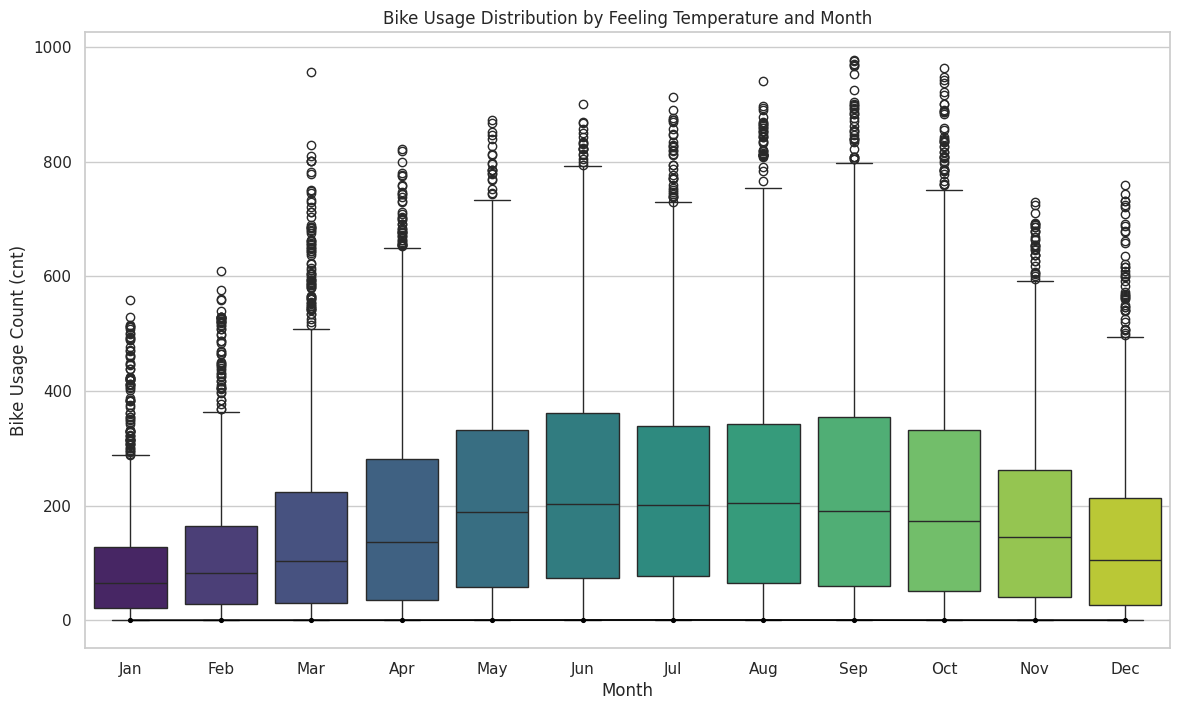

In [87]:
sns.set(style="whitegrid")

# Mengelompokkan data berdasarkan 'mnth' dan menghitung rata-rata feeling temperature per bulan
monthly_avg_feel_temp = hour_df.groupby('mnth')['atemp'].mean().reset_index()

# Membuat box plot untuk feeling temperature per bulan
plt.figure(figsize=(14, 8))
sns.boxplot(x='mnth', y='cnt', data=hour_df, palette='viridis')

# Menambahkan garis antara box plot menggunakan pointplot
sns.pointplot(x='mnth', y='atemp', data=monthly_avg_feel_temp, color='black', scale=0.5)

# Menambahkan judul dan label sumbu
plt.title('Bike Usage Distribution by Feeling Temperature and Month')
plt.xlabel('Month')
plt.ylabel('Bike Usage Count (cnt)')

# Menampilkan plot
plt.show()


## Conclusion

##### Conclusion pertanyaan 1

Berdasarkan barplot, dapat terlihat perbedaan tren penyewaan sepeda yang terjadi di hari libur dan hari kerja. Peminjaman sepeda cenderung lebih banyak pada hari kerja dibandingkan di hari  libur. Kemudian untuk jam peminjaman sepeda pun lebih banyak di jam-jam kerja seperti jam 8 dan jam pulang kerja seperti jam 5 sore hingga 6 sore. Sementara di hari libur, peminjaman sepeda cenderung lebih banyak pada jam 9, 10, 11, 12, 1 siang, hingga 3 sore.

##### Conclusion pertanyaan 2

Berdasarkan kedua plot tersebut, dapat terlihat banyaknya dan tren peminjaman sepeda yang terjadi dalam satu minggu dan dapat terlihatkira-kira peminjaman sepeda per jam dalam satu hari. Dapat terlihatpeminjaman sepeda terbanyak yaitu ada pada hari Sabtu, Minggu, dan Rabu dengan kira-kira rentang peminjam sepeda dalam satu hari sebanyak 4000 hingga 8000 peminjam. Untuk peminjam sepeda per jamnya, paling banyak sepeda dipinjam pada jam 8, 5 sore, dan 6 sore. Dengan peminjam sebanyak 300 hingga 400 lebih peminjam.

##### Conclusion pertanyaan 3

Berdasarkan gambar grafik, dapat dilihat peminjaman sepeda mengalami kenaikan dan penurunan tergantung dari cuaca. Berdasarkan grafik dapat diketahui peminjaman sepeda paling banyak terjadi ketika cuaca dalam kondisi yang cerah. Disusul oleh hujan ringa, berkabut, dan hujan deras yang memiliki jumlah peminjam sepeda yang paling sedikit. Dapat dilihat juga peminjaman sepeda terbanyak terjadi ketika cuaca cerah di bulan Mei dan Juni

##### Conclusion pertanyaan 4


Setiap batang pada bar plot menunjukkan rata-rata feeling temperature per bulan. Pada contoh ini, sumbu y menunjukkan nilai rata-rata feeling temperature. Grafik menunjukkan adanyan tren kenaikan dan penurunan yang terjadi pada peminjaman/penyewaan sepeda dalam satu tahun berdasarkan suhu yang dirasakan oleh pengguna. Dapat terlihat jumlah peminjam mengalami kenaikan pada bulan Januari hingga Juli karena berbanding lurus dengan kenaikan suhu. Kemudian jumlah peminjam sepeda mengalami penurunan pada bulan Juli hingga Januari, karena suhu juga mengalami penurunan. Namun dapat dilihat pada bulan Mei hingga Oktober pengguna sepeda terlihat konsisten yang menandakan terdapat kemungkinan suhu yang masih bisa ditoleransi oleh pesepeda